In [1]:
from gensim.models import word2vec
from IPython.display import display
model = word2vec.Word2Vec.load("../data/corpusModel.bin")


In [2]:
model.wv['computer']
model.wv.most_similar(positive=['學生', '女'], negative=['男'])
model.wv.similarity('女生', '學生')
# model.wv.most_similar('女生')

0.68551210435664522

In [3]:
vocab = list(model.wv.vocab)
X = model[vocab]

In [182]:
# vocab

In [ ]:
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2)
# X_tsne = tsne.fit_transform(X)

In [96]:
model['我']

array([ 3.75138998, -1.77936506,  1.30189145, -0.23343737,  2.17801023,
        0.89525419, -0.909015  , -5.17160463, -1.27585566, -0.70277172], dtype=float32)

In [12]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [13]:
from sklearn.decomposition import PCA
X_PCA = PCA(n_components=2,random_state=66).fit_transform(X_std)

In [14]:
import pandas as pd
df = pd.DataFrame(X_PCA, index=vocab, columns=['x', 'y'])

In [15]:
display(
    df.head(),
    df.describe()
)

x         y
嘴炮     1.994004  5.147973
雷豪     0.170783 -0.032357
收取    -0.205261 -0.381053
大馬     1.130840 -0.341714
seems -1.121531 -0.894616

x             y
count  1.409430e+05  1.409430e+05
mean  -9.202281e-10 -1.055556e-09
std    1.360490e+00  1.157008e+00
min   -1.775890e+01 -1.764714e+01
25%   -3.031111e-01 -2.069462e-01
50%    3.569010e-03  1.754311e-04
75%    2.289689e-01  1.449835e-01
max    2.132458e+01  1.912893e+01

In [130]:
index1 = model.wv.most_similar(u'上班')
index2 = model.wv.most_similar(u'學生')
index3 = model.wv.most_similar(u'大學')
index4 = model.wv.most_similar(u'女生')
index5 = model.wv.most_similar(u'社會')
index6 = model.wv.most_similar(u'嘴炮')

In [188]:
model.wv.most_similar(u'聽歌')

[('看妹', 0.9257118701934814),
 ('看劇', 0.923856258392334),
 ('幹麻', 0.9167904853820801),
 ('看電視', 0.9127871990203857),
 ('幹嘛', 0.908679187297821),
 ('唱歌', 0.9076588153839111),
 ('追劇', 0.8980386853218079),
 ('打遊戲', 0.8668056726455688),
 ('幹嗎', 0.8626375198364258),
 ('😶', 0.8546589016914368)]

In [178]:
import matplotlib
import matplotlib.pyplot as plt

zhfont = matplotlib.font_manager.FontProperties(fname='../data/wqy-microhei.ttc',size= 16)

fig = plt.figure(figsize = (13,11))
ax = fig.add_subplot(1,1,1)
for i in index1:
    word = i[0]
    ax.text(df.loc[word][0],df.loc[word][1], word, fontproperties=zhfont,color='C3') 
for i in index2:
    word = i[0]
    ax.text(df.loc[word][0],df.loc[word][1], word,fontproperties=zhfont,color='C7') 
    
for i in index3:
    word = i[0]
    ax.text(df.loc[word][0],df.loc[word][1], word, fontproperties=zhfont,color='C0')
    
for i in index4:
    word = i[0]
    ax.text(df.loc[word][0],df.loc[word][1], word, fontproperties=zhfont,color='C1')
for i in index5:
    word = i[0]
    ax.text(df.loc[word][0],df.loc[word][1], word, fontproperties=zhfont,color='C2')

for i in index6:
    word = i[0]
    ax.text(df.loc[word][0],df.loc[word][1], word, fontproperties=zhfont,color='C4')

In [179]:
axes = plt.gca()
axes.set_xlim([0,15])
axes.set_ylim([-12,17])


(-12, 17)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


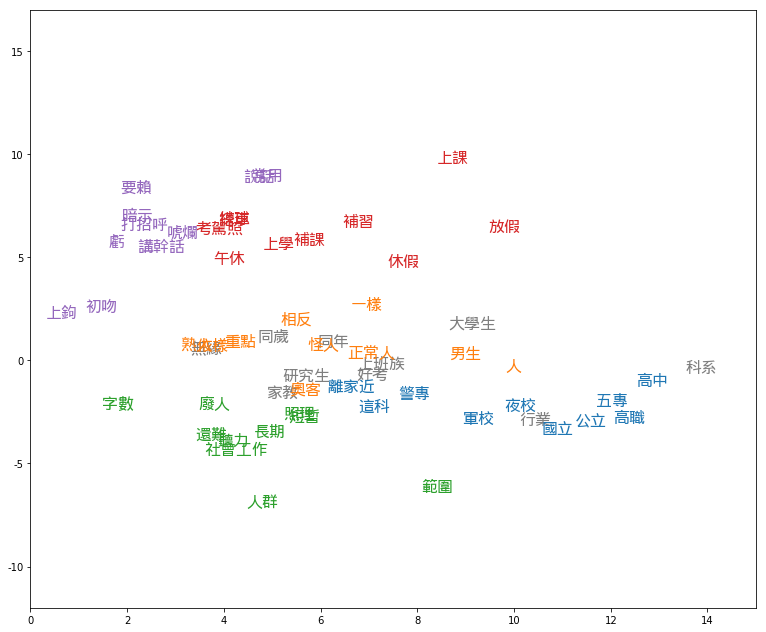

In [180]:
plt.show()

In [181]:
fig.savefig('test.png',dpi =200)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
